In [1]:
import pandas as pd

df = pd.read_csv('train.csv')
df.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [ ]:
target = df['rainfall'].to_numpy()

# (target[1:] == 1 and target[:-1]==1).mean()
# print("Rain_yest|Rain_|")
for a in [0,1]:
    for b in [0,1]:
        indices = target[:-1]==a
        probability = ((target[1:])[indices]==b).mean()
        print(a,b,probability)


0 0 0.34629629629629627
0 1 0.6537037037037037
1 0 0.21406913280776227
1 1 0.7859308671922377


<Axes: xlabel='day', ylabel='Historic probability'>

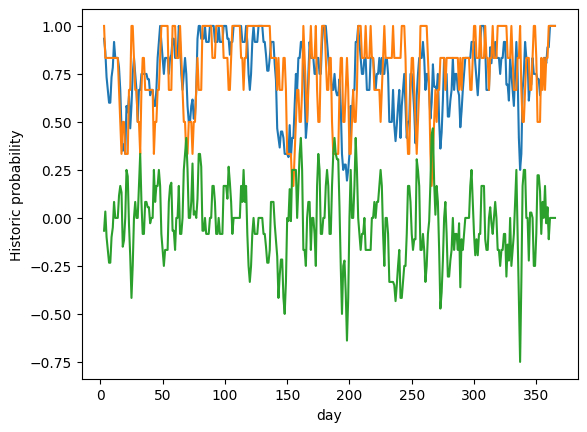

In [15]:
n = 365*4
df_train = df.iloc[:n]
df_test = df.iloc[n:]

hp = df_train.groupby('day')['rainfall'].mean().rolling(window=3).mean()
hp.plot(xlabel='id',ylabel='Historic probability')

hp_test = df_test.groupby('day')['rainfall'].mean().rolling(window=3).mean()
hp_test.plot(xlabel='id',ylabel='Historic probability')
# hp_3 = df['rainfall'].rolling(window=7).mean()
# hp_3.plot()
(hp-hp_test).plot()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
365,365,1,1012.2,17.1,16.1,14.6,14.7,93.0,96.0,0.2,30.0,20.0,1
730,730,1,1016.8,20.5,18.1,17.7,16.9,96.0,91.0,0.0,50.0,48.0,1
1095,1095,1,1017.8,16.9,15.9,14.6,15.0,90.0,100.0,0.0,40.0,24.2,1
